## Notebook - 3 - SQL Server

## Topics Covered in this notebook

1. DML Triggers in SQL Server
2. After update trigger in SQL Server
3. Instead of Insert trigger in SQL Server
4. Instead of Update trigger in SQL Server
5. Instead of Delete trigger in SQL Server
6. Derived tables and common table expressions in SQL Server
7. CTE in SQL Server
8. Updatable common table expression in SQL Server
9. Recursive CTE in SQL Server

## Triggers in SQL Server
In SQL server there are **3 types** of triggers
1. DML triggers
2. DDL triggers
3. Logon trigger

DML triggers are fired automatically in response to DML events ***(INSERT, UPDATE & DELETE)***

**DML triggers can be again classified into 2 types**
1. After triggers (Sometimes called as FOR triggers)
2. Instead of triggers

**After triggers, fires after the triggering action.** The INSERT, UPDATE, and DELETE statements, causes an after trigger to fire after the respective statements complete execution.

**INSTEAD of triggers, fires instead of the triggering action.** The INSERT, UPDATE, and DELETE statements, causes an INSTEAD OF trigger to fire INSTEAD OF the respective statement execution.

In [1]:
USE kudvenkatdb_master;

Commands completed successfully.

Total execution time: 00:00:00.012

In [ ]:
INSERT INTO tblEmployee VALUES ('Ben', 'Male',4800,'London')
DELETE FROM tblEmployee WHERE ID = 107;

In [11]:
CREATE table tblAudit(
    Id INT IDENTITY(1,1) PRIMARY KEY,
    AuditData NVARCHAR(255)
);


Commands completed successfully.

Total execution time: 00:00:00.002

In [14]:
CREATE TRIGGER tr_tblEmployee_ForInsert
ON tblEmployee
FOR INSERT
AS
BEGIN
    DECLARE @Id INT
    SELECT @Id = Id FROM inserted

    INSERT into tblAudit
    VALUES ('New Employee added with Id = '+CAST(@Id as nvarchar(5)) + ' at ' + CAST(GETDATE() as nvarchar(20)))
END

Commands completed successfully.

Total execution time: 00:00:00.003

In [2]:
CREATE TRIGGER tr_tblEmployee_ForDelete
ON tblEmployee
FOR DELETE
AS
BEGIN
    DECLARE @Id INT
    SELECT @Id = Id FROM deleted

    INSERT into tblAudit
    VALUES ('An existing employee deleted with Id = '+CAST(@Id as nvarchar(5)) + ' is deleted at ' + CAST(GETDATE() as nvarchar(20)))
END

Commands completed successfully.

Total execution time: 00:00:00.005

In [25]:
SELECT * FROM tblEmployee;
SELECT * FROM tblAudit;

(10 rows affected)

(9 rows affected)

Total execution time: 00:00:00.029

ID,Name,Gender,Salary,City
104,Todd,Male,2800,Sydney
102,John,Male,3500,London
100,Tom,Male,4000,London
103,Sam,Male,4500,London
110,Ben,Male,4800,London
105,Ben,Male,7000,New York
109,Russell,Male,8800,London
101,Pam,Female,3000,New York
108,Sara,Female,100000,London
106,Sneha,Female,100000,Sydney


Id,AuditData
1,New Employee added with Id = 110 at Jan 15 2024 12:50AM
2,An existing employee deleted with Id = 107 is deleted at Jan 15 2024 7:04AM
3,Employee with ID = 106 changed
4,Employee with ID = 106 changed
5,Employee with ID = 106 changed
6,Employee with ID = 106 changed Name from Sara Ali to Sara Ali Sara
7,Employee with ID = 106 changed
8,Employee with ID = 108 changed Name from James to SaraGender from Male to FemaleSalary from 6500 to 100000
9,Employee with ID = 106 changed Name from Sara Ali Sara to Sneha Salary from 4800 to 100000


## After Update Trigger
Note: The After trigger for UPDATE event, makes use of both ***inserted and deleted*** tables. The ***Inserted*** table contains the updated data and the ***deleted*** table contains the old data.

In [26]:
CREATE TRIGGER tr_tblEmployee_ForUpdate
on tblEmployee
for UPDATE
as
BEGIN   
    -- Logic
    -- Declare Fields
        DECLARE @Id INT
        
    
        DECLARE @OldName NVARCHAR(20), @NewName NVARCHAR(20)
        DECLARE @OldGender NVARCHAR(20), @NewGender NVARCHAR(20)
        DECLARE @OldSalary NVARCHAR(20), @NewSalary NVARCHAR(20)
        DECLARE @OldCity NVARCHAR(20), @NewCity NVARCHAR(20)

        DECLARE @AuditString NVARCHAR(1000)

    -- Store the updated data into temp table for creating the log
        SELECT * INTO #TempTable1 From inserted

    -- Iterate through each row
        WHILE (exists(SELECT @Id FROM #TempTable1))
        BEGIN
            SET @AuditString = ''

            SELECT TOP 1 @Id = ID, @NewName = Name,
            @NewGender = Gender, @NewSalary = Salary,
            @NewCity = City
            FROM #TempTable1

            SELECT @OldName = Name, @OldGender = Gender, 
            @OldSalary = Salary, @OldCity = City
            FROM deleted where ID = @Id

        -- Create the AUDITSTRING for the log...
            SET @AuditString = 'Employee with ID = ' + CAST(@Id as nvarchar(4)) + ' changed '

            if (@OldName <> @NewName)
                SET @AuditString = @AuditString + 'Name from ' + @OldName + ' to ' + @NewName

            if (@OldGender <> @NewGender)
                SET @AuditString = @AuditString + ' Gender from ' + @OldGender + ' to ' + @NewGender

            if (@OldSalary <> @NewSalary)
                SET @AuditString = @AuditString + ' Salary from ' + @OldSalary + ' to ' + @NewSalary

            if (@OldCity <> @NewCity)
                SET @AuditString = @AuditString + ' City from ' + @OldSalary + ' to ' + @NewSalary

        -- Insert into tblAudit
            INSERT INTO tblAudit VALUES(@AuditString)

        -- Delete the row from the tempTable, So next Iteration will proceed accordingly
            DELETE FROM #TempTable1 WHERE ID = @Id
        END
END

Commands completed successfully.

Total execution time: 00:00:00.005

In [ ]:
UPDATE tblEmployee SET NAME = 'Summit', Gender='Male', Salary= '100090' WHERE ID = 101

## Instead Of Triggers

In [36]:
select * from tblEmployee1;
select * from tblDepartment;

(10 rows affected)

(4 rows affected)

Total execution time: 00:00:00.015

ID,Name,Gender,Salary,DepartmentId
102,Mikey,Male,4000,1
103,Pam,Female,3000,3
104,John,Male,3500,1
105,Sam,Male,4500,2
106,Todd,Male,2800,2
107,Ben,Male,7000,1
108,Sara,Female,4800,3
110,James,Male,6500,NULL
111,Russell,Male,8800,NULL
112,Tom,Male,NULL,2


Id,DepartmentName,Location,DepartmentHead
1,HR,London,Rick
2,Payroll,Delhi,Ron
3,HR,New York,Christie
4,Other Department,Sydney,Cindrella


In [49]:
select * from vwEmployeesByDepartment;

(10 rows affected)

Total execution time: 00:00:00.016

Id,Name,Salary,Gender,DepartmentName
102,Mikey,4000,Male,HR
103,Pam,3000,Female,HR
104,John,3500,Male,HR
105,Sam,4500,Male,Payroll
106,Todd,2800,Male,Payroll
107,Ben,7000,Male,HR
108,Sara,4800,Female,HR
112,Tom,NULL,Male,Payroll
113,Sneha,100099,Female,HR
114,Pam Sara,10009999,Female,Other Department


## Instead of Insert trigger
    Here we perfrom the insert operation using the INstEAD OF trigger.
    We created this trigger on VIEW - which returns the list of Employees by their department.

In [46]:
CREATE TRIGGER tr_vwEmployeesByDepartment_InsteadOfInsert
on vwEmployeesByDepartment
INSTEAD OF INSERT
as 
BEGIN
    -- Declare fields
        DECLARE @DeptId INT

    -- check if there is a valid DepartmentId for the given DepartmentName
        SELECT @DeptId = t.Id
        FROM tblDepartment t
        JOIN inserted
        ON inserted.DepartmentName = t.DepartmentName

    -- IF DepartmentID is null throw an error and stop processing
        if (@DeptId is null)
        BEGIN
            RAISERROR('Invalid Department Name. Statement terminated', 16, 1)
            RETURN
        END
    
    -- Finally insert into tblEmployee1 table
        INSERT INTO tblEmployee1(Name,Gender,Salary,DepartmentId)
        SELECT Name, Gender, Salary, @DeptId
        FROM inserted
END

Commands completed successfully.

Total execution time: 00:00:00.006

In [48]:
INSERT INTO vwEmployeesByDepartment (Name, Gender, Salary, DepartmentName) VALUES('Pam Sara','Female',10009999,'Other Department')

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.007

## Instead of Update trigger

In [10]:
-- Create Insead Of Update trigger...
CREATE TRIGGER tr_vwEmployeesByDepartment_InsteadOfUpdate
on vwEmployeesByDepartment
INSTEAD OF UPDATE
AS
BEGIN
    -- if EmployeeId is updated
        if (UPDATE(ID))
        BEGIN
            RAISERROR('ID cannot be changed', 16,1);
            RETURN
        END

    -- if DpetName is updated
        if (UPDATE(DepartmentName))
        BEGIN
            DECLARE @DeptId INT

            SELECT @DeptId = t.Id
            from tblDepartment as t
            JOIN inserted
            on inserted.DepartmentName = t.DepartmentName

			if (@DeptId is NULL)
			begin
				Raiserror('Invalid department name',16,1)
				return
			END

			update tblEmployee1 set DepartmentId = @DeptId
			from inserted
			join tblEmployee1
			on tblEmployee1.ID = inserted.Id
		END

	-- if name is updated
		if (UPDATE(Name))
		Begin
			update tblEmployee1 set Name = inserted.Name
			from inserted
			join tblEmployee1
			on tblEmployee1.ID = inserted.Id 
		END

	-- if gender is updated
		if (UPDATE(Gender))
		Begin
			update tblEmployee1 set Gender = inserted.Gender
			from inserted
			join tblEmployee1
			on tblEmployee1.ID = inserted.Id 
		END

	-- if salary is updated
		if (UPDATE(Salary))
		Begin
			update tblEmployee1 set Salary = inserted.Salary
			from inserted
			join tblEmployee1
			on tblEmployee1.ID = inserted.Id 
		END
END

Commands completed successfully.

Total execution time: 00:00:00.010

In [9]:
SELECT * FROM vwEmployeesByDepartment

(10 rows affected)

Total execution time: 00:00:00.012

Id,Name,Salary,Gender,DepartmentName
102,Mikey Miley,100099,Female,Other Department
103,Pam,3000,Female,HR
104,John,3500,Male,HR
105,Sam,4500,Male,Payroll
106,Todd,2800,Male,Payroll
107,Ben,7000,Male,HR
108,Sara,4800,Female,HR
112,Tom,NULL,Male,Payroll
113,Sneha,100099,Female,HR
114,Pam Sara,10009999,Female,Other Department


In [8]:
UPDATE vwEmployeesByDepartment SET DepartmentName = 'Other Department', Name='Mikey Miley', Gender='Female', Salary=100099 WHERE Id = 102

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.023

## Instead Of Delete trigger

    Trigger             |       INSERTED OR DELETED
    Instead of Insert   |       DELETED table is always empty and the INSERTED table contains the newly inserted data.
    Instead of Delete   |       INSERTED table is always empty and the DELETED table contains the rows deleted
    Instead of Update   |       DELETED table contains OLD data (before update), and inserted table contains NEW data(Updated data)


**Note:** In most cases JOINS are faster than SUB-QUERIES. However, in cases, where you only need a subset of records from a table that you are joining with, sub-queries can be faster.

In [11]:
DELETE from vwEmployeesByDepartment WHERE Id = 102

: Msg 4405, Level 16, State 1, Line 1
View or function 'vwEmployeesByDepartment' is not updatable because the modification affects multiple base tables.

Total execution time: 00:00:00.041

In [13]:
CREATE Trigger tr_vwEmployeesByDepartment_InsteadOfDelete
on vwEmployeesByDepartment
INSTEAD OF DELETE
as 
BEGIN
    DELETE tblEmployee1
    FROM tblEmployee1
    join deleted
    on tblEmployee1.ID = deleted.Id
END

Commands completed successfully.

Total execution time: 00:00:00.003

In [14]:
DELETE from vwEmployeesByDepartment WHERE Id = 102

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.006

In [15]:
SELECT * FROM vwEmployeesByDepartment

(9 rows affected)

Total execution time: 00:00:00.071

Id,Name,Salary,Gender,DepartmentName
103,Pam,3000,Female,HR
104,John,3500,Male,HR
105,Sam,4500,Male,Payroll
106,Todd,2800,Male,Payroll
107,Ben,7000,Male,HR
108,Sara,4800,Female,HR
112,Tom,NULL,Male,Payroll
113,Sneha,100099,Female,HR
114,Pam Sara,10009999,Female,Other Department


## Derived Tables and Common Table Expression (CTE)
    Derived tables and common table expressions Compare with - Views, Table Variable, Local and Global Temp Tables

---
We have the View below which returns the summarized data of the Employees and their department.



In [7]:
sp_helptext vwSummarizedData

Commands completed successfully.

Total execution time: 00:00:00.095

Text
CREATE VIEW vwSummarizedData
as
"SELECT DepartmentName, Count(*) as TotalEmployees"
from tblEmployee1
JOIN tblDepartment
ON tblEmployee1.DepartmentId = tblDepartment.Id
GROUP By DepartmentName


In [9]:
select * from vwSummarizedData

(3 rows affected)

Total execution time: 00:00:00.012

DepartmentName,TotalEmployees
HR,5
Other Department,1
Payroll,3


<span style="color: #569cd6;font-weight: bold;">**Note:**</span> Views get saved in the database, and can be available to other queries and stored procedures. However, if this view is only used at this one place, it can be easily eliominated using other options, like CTE, Derived Tables, Temp Tables, Table Variable etc.

## Above we can achieve with the Temp Tables

In [10]:
SELECT      DepartmentName, Count(*) as TotalEmployees  
into        #TempEmployeeCount
from        tblEmployee1 
JOIN        tblDepartment  
ON          tblEmployee1.DepartmentId = tblDepartment.Id  
GROUP By    DepartmentName

SELECT      DepartmentName, TotalEMployees
FROM        #TempEmployeeCount


-- It is always best practice to drop the TempTable after use...
--DROP Table #TempEmployeeCount

(3 rows affected)

(3 rows affected)

Total execution time: 00:00:00.009

DepartmentName,TotalEMployees
HR,5
Other Department,1
Payroll,3


**Note:** Temporary tables are stored in TEmpDB. Local temporary tables are visible only in the current session, and can be shared b/w nested stored prcedure calls. Global temprary tables are visible to other sessions and are detroyed, when the last connection referencing the table is closed.

## Above we can achieve with the Table Variable


In [14]:
DECLARE     @tblEmployeeCOunt table(DepartmentName nvarchar(30), TotalEmployees int)

Insert      @tblEmployeeCount
SELECT      DepartmentName, Count(*) as TotalEmployees  
from        tblEmployee1 
JOIN        tblDepartment  
ON          tblEmployee1.DepartmentId = tblDepartment.Id  
GROUP By    DepartmentName

SELECT      DepartmentName, TotalEMployees
FROM        @tblEmployeeCount

(3 rows affected)

(3 rows affected)

Total execution time: 00:00:00.070

DepartmentName,TotalEMployees
HR,5
Other Department,1
Payroll,3


**Note** Just like TempTables, a table vari

In [15]:
SELECT      DepartmentName, TotalEMployees
FROM        @tblEmployeeCount

: Msg 1087, Level 15, State 2, Line 2
Must declare the table variable "@tblEmployeeCount".

Total execution time: 00:00:00.001

**Note:** Just like TempTables, a table variable is also created in TempDB. The scope of a table variable is the batch, stored procedure, or statement block in which it is declared. They can be passed as parameters b/w procedures.

## Above we can achieve with the Derived Tables


In [16]:
SELECT      DepartmentName, TotalEmployees
FROM (
        SELECT      DepartmentName, Count(*) as TotalEmployees  
        from        tblEmployee1 
        JOIN        tblDepartment  
        ON          tblEmployee1.DepartmentId = tblDepartment.Id  
        GROUP By    DepartmentName
    )
as EmployeeCount

-- EmployeeCount is the derived table

(3 rows affected)

Total execution time: 00:00:00.012

DepartmentName,TotalEmployees
HR,5
Other Department,1
Payroll,3


**Note:** Derived tables are available only in the context of the current query.

## Above we can achieve with the CTE - COMMON TABLE EXPRESSION


In [17]:
WITH EmployeeCount(DepartmentName, TotalEmployees)
as
(
    SELECT      DepartmentName, Count(*) as TotalEmployees  
    from        tblEmployee1 
    JOIN        tblDepartment  
    ON          tblEmployee1.DepartmentId = tblDepartment.Id  
    GROUP By    DepartmentName
)

SELECT DepartmentName, TotalEmployees FROM EmployeeCount

(3 rows affected)

Total execution time: 00:00:00.007

DepartmentName,TotalEmployees
HR,5
Other Department,1
Payroll,3


**Note:** A CTE can be thought of as a temporary result set that is defined within the execution scope of a single SELECT, INSER, UPDATE, DELETE, or CREATE VIEW statement. A CTE is similar to a derived table in that it is not stored as an object and lasts only for the duration of the query.

## CTE - Common Table Expression
***Common table expression (CTE)*** is introduced in SQL server 2005. A CTE is a temporary result set, that can be referenced within a SELECT, INSERT, UPDATE, or DELETE statement, that immediately follows the CTE.

---

### Syntax
    WITH cte_name (Column1, Column2,.....) 
    as 
    (
        CTE_query
    )



In [19]:
WITH EmployeeCount(DepartmentId, TotalEmployees)
as
(
    SELECT      DepartmentId, Count(*) as TotalEmployees  
    from        tblEmployee1
    GROUP By    DepartmentId
)

SELECT      DepartmentName, TotalEmployees 
FROM        tblDepartment
JOIN        EmployeeCount
ON          tblDepartment.Id = EmployeeCount.DepartmentId
ORDER BY    TotalEmployees

(4 rows affected)

Total execution time: 00:00:00.012

DepartmentName,TotalEmployees
Other Department,1
HR,2
Payroll,3
IT,3


### A CTE can only be referenced by a SELECT, INSERT, UPDATE, or DELETE statement, that immediately follows the CTE.

In [20]:
WITH EmployeeCount(DepartmentId, TotalEmployees)
as
(
    SELECT      DepartmentId, Count(*) as TotalEmployees  
    from        tblEmployee1
    GROUP By    DepartmentId
)

SELECT 'Say Hello'

SELECT      DepartmentName, TotalEmployees 
FROM        tblDepartment
JOIN        EmployeeCount
ON          tblDepartment.Id = EmployeeCount.DepartmentId
ORDER BY    TotalEmployees

: Msg 422, Level 16, State 4, Line 11
Common table expression defined but not used.

Total execution time: 00:00:00.003

## Creating multiple CTE's using a single WITH clause

In [2]:
WITH EmployeesCountBy_Payroll_IT_Dept (DepartmentName, Total)
AS
(
    SELECT t2.DepartmentName, COUNT(t1.ID) as TotalEmployees
    FROM tblEmployee1 as t1
    JOIN tblDepartment as t2 ON t1.DepartmentId = t2.Id 
    WHERE t2.DepartmentName IN ('Payroll', 'IT') 
    GROUP BY t2.DepartmentName
),
EmployeesCountBy_HR_OtherDept (DepartmentName, Total)
AS
(
    SELECT DepartmentName, COUNT(t1.ID) as TotalEmployees
    FROM tblEmployee1 as t1
    JOIN tblDepartment as t2 ON t1.DepartmentId = t2.Id 
    WHERE t2.DepartmentName IN ('HR', 'Other Department')
    GROUP BY t2.DepartmentName
)
    
SELECT * FROM EmployeesCountBy_Payroll_IT_Dept
UNION
SELECT * FROM EmployeesCountBy_HR_OtherDept
--ORDER BY Total;


(4 rows affected)

Total execution time: 00:00:00.172

DepartmentName,Total
HR,2
IT,3
Other Department,1
Payroll,3


## Updatable Common Table Expression (CTE)

### CTE on one base table

### Is it possible to UPDATE the CTE - Yes & No


So, if a CTE is created on one base table, then it is possible to UPDATE the CTE, which will turn in update the underlying base table.

In [13]:
-- CTE with one base table...
WITH Employees_Name_Gender
AS(
    SELECT ID, Name, Gender from tblEMployee1
)

SELECT * FROM Employees_Name_Gender;



(11 rows affected)

Total execution time: 00:00:00.006

ID,Name,Gender
103,Pam,Female
104,John,Male
105,Sam,Male
106,Todd,Male
107,Ben,Male
108,Sara,Female
110,James,Male
111,Russell,Male
112,Tom,Male
113,Sneha,Female


In [14]:
-- CTE with one base table...
WITH Employees_Name_Gender
AS(
    SELECT ID, Name, Gender from tblEMployee1
)

UPDATE Employees_Name_Gender set Gender = 'Female' WHERE ID = 104


(1 row affected)

Total execution time: 00:00:00.002

In [15]:
-- CTE with one base table...
WITH Employees_Name_Gender
AS(
    SELECT ID, Name, Gender from tblEMployee1
)

SELECT * FROM Employees_Name_Gender;

(11 rows affected)

Total execution time: 00:00:00.010

ID,Name,Gender
103,Pam,Female
104,John,Female
105,Sam,Male
106,Todd,Male
107,Ben,Male
108,Sara,Female
110,James,Male
111,Russell,Male
112,Tom,Male
113,Sneha,Female


### CTE on 2 base tables

Note: If a CTE is based on more than one base table, and if the UPDATE affects only one base table, then the UPDATE is allowed.

In [19]:
-- CTE with 2 base table...
WITH EmployeesByDepartment
AS(
    SELECT t1.ID, t1.Name, t1.Gender, t2.DepartmentName
    from tblEMployee1 as t1
    JOIN tblDepartment as t2
    on t2.Id = t1.DepartmentId
)

SELECT * FROM EmployeesByDepartment;


(9 rows affected)

Total execution time: 00:00:00.011

ID,Name,Gender,DepartmentName
103,Pam,Female,IT
104,John,Female,HR
105,Sam,Male,Payroll
106,Todd,Male,Payroll
107,Ben,Male,HR
108,Sara,Female,IT
112,Tom,Male,Payroll
113,Sneha,Female,IT
114,Pam Sara,Female,Other Department


In [21]:
-- CTE with 2 base table...
WITH EmployeesByDepartment
AS(
    SELECT t1.ID, t1.Name, t1.Gender, t2.DepartmentName
    from tblEMployee1 as t1
    JOIN tblDepartment as t2
    on t2.Id = t1.DepartmentId
)
UPDATE EmployeesByDepartment set Gender = 'Male' WHERE ID = 104


(1 row affected)

Total execution time: 00:00:00.004

In [22]:
-- CTE with 2 base table...
WITH EmployeesByDepartment
AS(
    SELECT t1.ID, t1.Name, t1.Gender, t2.DepartmentName
    from tblEMployee1 as t1
    JOIN tblDepartment as t2
    on t2.Id = t1.DepartmentId
)

SELECT * FROM EmployeesByDepartment;


(9 rows affected)

Total execution time: 00:00:00.016

ID,Name,Gender,DepartmentName
103,Pam,Female,IT
104,John,Male,HR
105,Sam,Male,Payroll
106,Todd,Male,Payroll
107,Ben,Male,HR
108,Sara,Female,IT
112,Tom,Male,Payroll
113,Sneha,Female,IT
114,Pam Sara,Female,Other Department


## Case - 2

CTE on 2 base tables

Note: If a CTE is based on multiple tables, and if the UPDATE statement affects more then 1 base table, then the UPDATE is not allowed.

In [25]:
-- CTE with 2 base table...
WITH EmployeesByDepartment
AS(
    SELECT t1.ID, t1.Name, t1.Gender, t2.DepartmentName
    from tblEMployee1 as t1
    JOIN tblDepartment as t2
    on t2.Id = t1.DepartmentId
)
UPDATE EmployeesByDepartment set Gender = 'Female', DepartmentName = 'IT' WHERE ID = 104

: Msg 4405, Level 16, State 1, Line 2
View or function 'EmployeesByDepartment' is not updatable because the modification affects multiple base tables.

Total execution time: 00:00:00.002

Note: A CTE is baed on more than one abse table, and if the UPDATE affects only one base table, the UPDATE succeeds (But not as expected always).

--- 


## Updatable CTE

1. If a CTE is based on a single base table, then the UPDATE succeeds and works as expected.
2. If a CTE is based on more than one base table, and if the UPDATE affects multiple base tables, the update is not allowed and the statement terminates
with an error.
3. If a CTE is based on more than one base table, and if the UPDATE affects only one base table, the UPDATE succeeds(but not as expected always)

## Recursive CTE

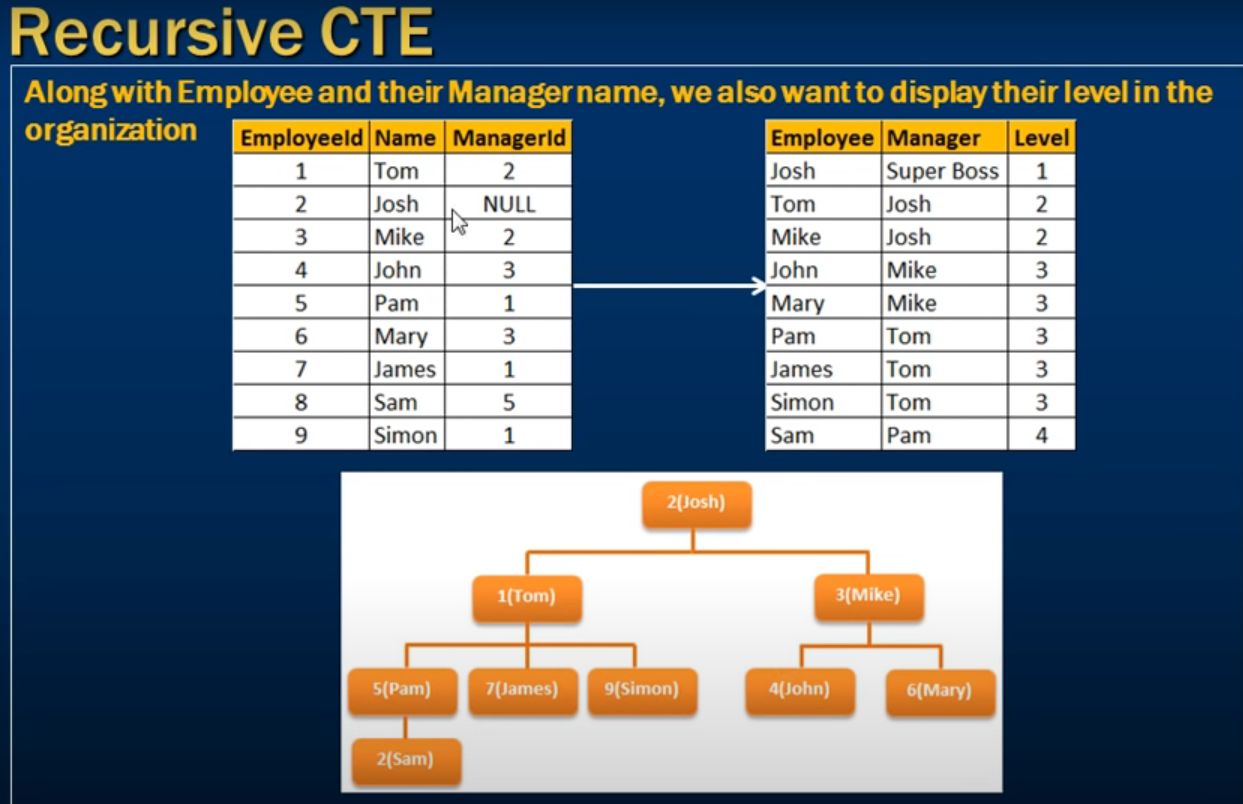

In [30]:
Create table tblEmployeeManager(
    EmployeeID int PRIMARY KEY,
    Name NVARCHAR(50),
    ManagerID int
);

Commands completed successfully.

Total execution time: 00:00:00.009

In [31]:
insert into tblEmployeeManager VALUES (1, 'Tom',2), (2,'Josh', null), (3,'Mike',2), (4,'John',3), (5,'Pam',1), (6,'Mary',3),(7,'James',1),(8,'Sam',5),(9,'Simon',1)

(9 rows affected)

Total execution time: 00:00:00.124

In [32]:
select * from tblEmployeemanager

(9 rows affected)

Total execution time: 00:00:00.011

EmployeeID,Name,ManagerID
1,Tom,2
2,Josh,NULL
3,Mike,2
4,John,3
5,Pam,1
6,Mary,3
7,James,1
8,Sam,5
9,Simon,1


In [41]:
WITH
    EmployeesCTE (EmployeeID, Name, ManagerID, [Level])
    AS
    (
        SELECT EmployeeID, Name, ManagerID, 1
        FROM tblEmployeemanager
        WHERE ManagerID is null

        union ALL

        SELECT t1.EmployeeID, t1.Name, t1.ManagerID, EmployeesCTE.[Level] + 1
        from tblEmployeemanager as t1
        JOIN EmployeesCTE
        ON t1.ManagerID = EmployeesCTE.EmployeeID

    )

    SELECT t.Name as Employee, ISNULL(t1.Name, 'Super Boss') as Manager, t.[Level]
    from EmployeesCTE AS t
    LEFT JOIN EmployeesCTE as t1
    on t.ManagerID = t1.EmployeeID

(9 rows affected)

Total execution time: 00:00:00.046

Employee,Manager,Level
Josh,Super Boss,1
Tom,Josh,2
Mike,Josh,2
John,Mike,3
Mary,Mike,3
Pam,Tom,3
James,Tom,3
Simon,Tom,3
Sam,Pam,4
